### Fill in your name, student id number and email address
#### name: Lauri Orava
#### student id: 516761
#### email: laorav@utu.fi

## Data analysis and knowledge discovery - Exercise 4: Unsupervised learning

This is the template for the fourth exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering algorithm to find patterns - in this case clusters of ships with the same type - in the data, and then evaluate the performance of the algorithm.


 - As in the two previous exercises, the grading scale is 0 (failed), 50 (passed) and 100 (passed with honors).
 
 - For a passing grade each part of the exercise must be done and questions answered. Some small mistakes can be tolerated but try to avoid any. All of the cells in your submitted notebook should be able to run without errors. Clean up the notebook before submitting it by deleting unnecessary cells and pieces of code for better readability.

 - Remember to comment your code to explain how it works and what it is supposed to do (messy, uncommented and badly written code may contribute to a failing grade).
 
 - Answer the questions asked in the assignments in the markdown cells below the code cells.

 - For doing both the exercise and the optional bonus task sufficiently well, you will be awarded one bonus point (passed with honors).
 
 - If you are having problems with this exercise, try google or stackoverflow first, but do not merely copy-paste any code you may find, since it can be considered plagiarism. (See exercise guidelines in the Moodle page of this course) If you still can't find a solution to your problem, ask for help in the course discussion forum in moodle or contact ilksuu@utu.fi.

### Import all the libraries etc. you need

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import standardize
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, adjusted_rand_score

### Read the data

- Download the exercise 4 data from exercise 4 tab in the Moodle page of this course.
- Read the ship data from the csv file into a Pandas dataframe.
- This file is already cleaned of outliers and missing values etc. Normally data cleaning is an important part of unsupervised learning, but since it has already been done in the previous exercises, we can start this one with already clean data.

In [4]:
shipdata = pd.read_csv('shipdata2021_ex4.txt')

shipdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           134 non-null    int64  
 1   Speed          134 non-null    float64
 2   COG            134 non-null    float64
 3   Destination    134 non-null    object 
 4   Ship_type      134 non-null    object 
 5   Gross_tonnage  134 non-null    int64  
 6   Length         134 non-null    float64
 7   Breadth        134 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 8.5+ KB


### Part 1: Preprocess and visualize the data

 - Use "Speed", "COG", "Length", and "Gross_tonnage" as features for this exercise. You will also need the 'Ship_type' -column later to be used as labels for evaluating the performance of the clustering algorithm.
  
 - Perform z-score standardization on the features to ensure that all features have the same scale.
 
 - Project the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet. Can you guess where the different ship types are in the scatter plot? Don't worry if they're hard to see.
 
 - The set of features used in this exercise is not necessarily the most sensible from the point of view of real life maritime data-analysis, but rather has been chosen in an ad-hoc manner for the purpose of designing this exercise with a certain level of clustering performance. Consider the features given for now.

C:\Python39\lib\site-packages\mlxtend\preprocessing\scaling.py:107: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


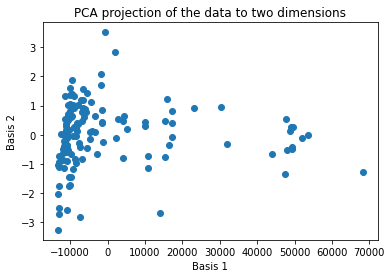

<Figure size 432x288 with 0 Axes>

In [7]:
# Prepare arrays X ('Speed', 'COG', 'Length' and Gross_tonnage') by dropping unnecessary columns
X = shipdata.drop(columns=['MMSI', 'Destination','Ship_type', 'Breadth'])
# Prepare array Y for labeling
Y = shipdata['Ship_type']

# Perform Z-score standardization
X['Speed'] = standardize(X['Speed'])
X['COG'] = standardize(X['COG'])
X['Length'] = standardize(X['Length'])
X['Breadth'] = standardize(X['Gross_tonnage'])

# Do two dimensional PCA on array X
pca = PCA(n_components=2)

# Do the projection to two basis vectors, basis 1 and 2
X2 = pd.DataFrame(data= pca.fit_transform(X), columns= ['basis1', 'basis2'])

# Plot results
plt.scatter(X2['basis1'], X2['basis2'])
plt.title("PCA projection of the data to two dimensions")
plt.xlabel("Basis 1")
plt.ylabel("Basis 2")
plt.show()
plt.clf()

####  Part 1 : Answers here:

It looks like we have a single sparse cluster on the right, one cluster on the middle and one huge cluster on the left. I believe these clusters to be the different ship types, though I am unable to name them with this data.

### Part 2: Perform clustering on the data and evaluate the results using silhouette score

 - What is the significance of the linkage criterion in a hierarchical clustering algorithm?
 
 - Perform agglomerative hierarchical clustering on the data, trying different values for the "linkage" parameter. Use the actual number of different ship types for the number of clusters to find and default values for other parameters.
 
 - Use the z-score standardized 4-dimensional data for the clustering - not the PCA-transformed data!
 
 - Evaluate the clustering performance for each linkage criterion using a metric called "silhouette score". What does silhouette score quantify and how is it computed?

In [11]:
# Agglomerative clustering
# All default except number of clusters
# Different linkage in each
cl_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
cl_single = AgglomerativeClustering(n_clusters=3, linkage='single')
cl_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
cl_average = AgglomerativeClustering(n_clusters=3,linkage='average')

# Fit standardized 4D data with all linkages
cluster_ward = cl_ward.fit(X)
cluster_single = cl_single.fit(X)
cluster_complete = cl_complete.fit(X)
cluster_average = cl_average.fit(X)

# Calculate silhouette score
print("ward linkage: ", silhouette_score(X,cluster_ward.labels_))
print("single linkage: ", silhouette_score(X,cluster_single.labels_))
print("complete linkage: ", silhouette_score(X,cluster_complete.labels_))
print("average linkage: ", silhouette_score(X,cluster_average.labels_))

ward linkage:  0.7775881875743484
single linkage:  0.7937913988614778
complete linkage:  0.7641826880643922
average linkage:  0.7641826880643922


####  Part 2 : Answers here:

Linkage criterions differ in how they define the proximity between any two clusters at any given step.

Silhoutte score is a real number between -1 and 1. When it approaches 1, the clusters are well separated from each other and are compact.
Our highest silhoutte score for our agglomerative clustering was ~0.79 with single-linkage.

The results aren't that different with the other linkage options presented, quite similar in fact.

###  Part 3a: Compare the clusters with the true labels
 
 - If you performed the previous steps as instructed, the "average" linkage criterion should be the best performing linkage criterion (that is, with respect to the silhouette score).
 
 - Perform agglomerative hierarchical clustering on the (z-score standardized, not pca-transformed) data using the "average" linkage criterion and the number of different ship types for the number of clusters to find. Again, use default values for other parameters. Visualize the clusters with a scatterplot by performing PCA transformation to two dimensions and color the scatterplot based on the predictions produced by the clustering algorithm. 
 
 - Visualize the data again using PCA, this time coloring the scatter plot based on the true class labels. Compare the two scatter plots: how well do the clusters found by the clustering algorithm match the true classes? Place the two scatter plots so that they can easily be compared (e.g. in subplots next to each other in the same figure).
 
 - Based on the visual comparison between the clusters and true classes, would you say that the clustering was successful?
 
 - Rand score is a measure of similarity between two partitions of a set of elements - in this case true classes and clusters found by the clustering algorithm - and it is one of the most frequently used performance metrics for clustering. It is computed by considering each pair of elements in the dataset and counting pairs of elements as follows:
 
         a: number of pairs such that the elements are in the same class and in the same cluster
         b: number of pairs such that the elements are in different classes and in different clusters
         c: number of pairs such that the elements are in the same class but in different clusters
         d: number of pairs such that the elements are in different classes but in the same cluster
     
     Given a, b, c, d, the formula for rand index is:
     
         rand_index = (a+b)/(a+b+c+d).
     
- "Adjusted rand index" is corrected for chance by using maximum and expected values of rand index.

        adj_rand_index = (rand_index - expected_rand_index) / (max_rand_index - expected_rand_index)
 
- For an objective evaluation of the clustering, compute the adjusted rand score (use the scikit-learn implementation) using the true labels and the labels predicted by clustering algorithm. How do you interpret the result?
 
- If the results seem unimpressive, don't get discouraged - clustering "real life" data sets is a difficult task, and a low rand score does not necessarily mean that you have made a mistake.

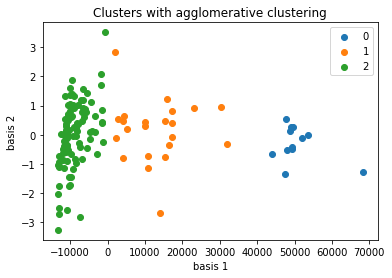

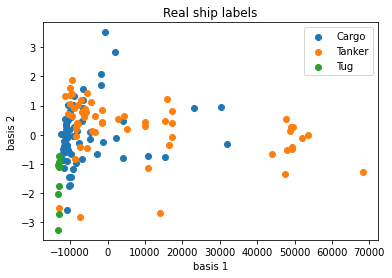

0.05236517818309768

<Figure size 432x288 with 0 Axes>

In [30]:
# Clustered data

# Visualizing the cluster with the predicted labels
# Plot X2 with colors corresponding to cluster.labels_
labels = pd.DataFrame(cluster_average.labels_, columns=['label'])
X_cluster = pd.concat([X2, labels],axis=1)

# Different arrays for easy legend()
X_cluster0 = X_cluster[X_cluster.label == 0]
X_cluster1 = X_cluster[X_cluster.label == 1]
X_cluster2 = X_cluster[X_cluster.label == 2]

# Real labels

# Combine dataframes
X_real = pd.concat([X2,Y], axis=1)

# Different arrays for easy legend()
X_real_cargo = X_real[X_real.Ship_type == 'Cargo']
X_real_tanker = X_real[X_real.Ship_type == 'Tanker']
X_real_tug = X_real[X_real.Ship_type == 'Tug']


# Plot

"""
plt.subplot(1, 2, 1)
plt.scatter(X_cluster0['basis1'], X_cluster0['basis2'], label = '0')
plt.scatter(X_cluster1['basis1'], X_cluster1['basis2'], label = '1')
plt.scatter(X_cluster2['basis1'], X_cluster2['basis2'], label = '2')
plt.xlabel("basis 1")
plt.ylabel("basis 2")
plt.legend()
plt.title("Clusters with agglomerative clustering")

plt.subplot(1, 2, 2)
plt.scatter(X_real_cargo['basis1'],X_real_cargo['basis2'], label = 'Cargo')
plt.scatter(X_real_tanker['basis1'],X_real_tanker['basis2'], label = 'Tanker')
plt.scatter(X_real_tug['basis1'],X_real_tug['basis2'], label = 'Tug')
plt.xlabel("basis 1")
plt.ylabel("basis 2")
plt.legend()
plt.title("Real ship labels")

plt.tight_layout()
plt.show()
"""

plt.scatter(X_cluster0['basis1'], X_cluster0['basis2'], label = '0')
plt.scatter(X_cluster1['basis1'], X_cluster1['basis2'], label = '1')
plt.scatter(X_cluster2['basis1'], X_cluster2['basis2'], label = '2')
plt.xlabel("basis 1")
plt.ylabel("basis 2")
plt.legend()
plt.title("Clusters with agglomerative clustering")
plt.show()
plt.clf()

plt.scatter(X_real_cargo['basis1'],X_real_cargo['basis2'], label = 'Cargo')
plt.scatter(X_real_tanker['basis1'],X_real_tanker['basis2'], label = 'Tanker')
plt.scatter(X_real_tug['basis1'],X_real_tug['basis2'], label = 'Tug')
plt.xlabel("basis 1")
plt.ylabel("basis 2")
plt.legend()
plt.title("Real ship labels")
plt.show()
plt.clf()

# Random score

# In order to calculate the adjusted random score we need to change the labels to numerical data (like the cluster labels)
# Turn the labels in to integers according to findings on the plots
# Initialize numeric vector
label_num = np.zeros(len(Y))

# Loop over the labels and assign corresponding values
for i in range(len(Y)):
  if Y[i] == 'Cargo':
    label_num[i] = 0
  elif Y[i] == 'Tanker':
    label_num[i] = 1
  else:
    label_num[i] = 2

# Calculate adjusted random score between real labels and cluster labels
adjusted_rand_score(label_num, cluster_ward.labels_)

####  Part 3a : Answers here:

(Had problems with figures and having the two plots side by side made them both hard to analyse so I opted out of having them horizontally aligned. At least in my screen they are still both visible at the same time. Old code commented out.)

I would not say the clustering was a success. We managed to find clusters based on ship type features yes, however each ship type has a huge range of values for each feature and therefore our clustering fails.

The adjusted rand index is ~0.05. According to the documentation, this score indicates "a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings."
Meaning that when this value approaches 1, the clusters are more identical, and if the value is close to zero the clusters could as well be randomly labeled.

Our score of ~0.05 is very close to the labels just being randomly assigned.

###  Part 3b: Another linkage criterion
 
 - Perform the same steps as in the previous task (3a), but this time using the "complete" linkage criterion. Visualize the clusters (predicted labels vs. the real labels) and compute the adjusted rand score for the predictions.
 
 - Which linkage criterion performs better based on visual inspection and the adjusted rand score? How do the two criteria differ from each other?
 
 - Compare the formulas for adjusted rand score and silhouette score. Can you explain (briefly) why a given linkage criterion can perform relatively well with respect to one metric and badly w.r.t. the other one?

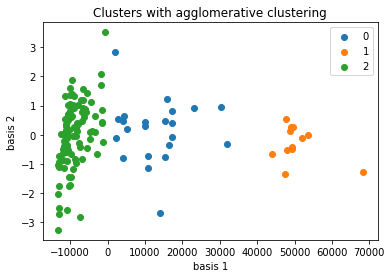

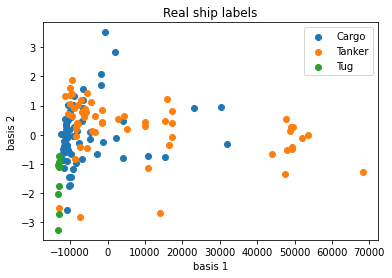

0.04417525002330448

<Figure size 432x288 with 0 Axes>

In [31]:
labels = pd.DataFrame(cluster_complete.labels_, columns=['label'])
X_cluster = pd.concat([X2, labels],axis=1)

X_cluster0 = X_cluster[X_cluster.label == 0]
X_cluster1 = X_cluster[X_cluster.label == 1]
X_cluster2 = X_cluster[X_cluster.label == 2]

X_real = pd.concat([X2,Y], axis=1)

X_real_cargo = X_real[X_real.Ship_type == 'Cargo']
X_real_tanker = X_real[X_real.Ship_type == 'Tanker']
X_real_tug = X_real[X_real.Ship_type == 'Tug']


plt.scatter(X_cluster0['basis1'], X_cluster0['basis2'], label = '0')
plt.scatter(X_cluster1['basis1'], X_cluster1['basis2'], label = '1')
plt.scatter(X_cluster2['basis1'], X_cluster2['basis2'], label = '2')
plt.xlabel("basis 1")
plt.ylabel("basis 2")
plt.legend()
plt.title("Clusters with agglomerative clustering")
plt.show()
plt.clf()

plt.scatter(X_real_cargo['basis1'],X_real_cargo['basis2'], label = 'Cargo')
plt.scatter(X_real_tanker['basis1'],X_real_tanker['basis2'], label = 'Tanker')
plt.scatter(X_real_tug['basis1'],X_real_tug['basis2'], label = 'Tug')
plt.xlabel("basis 1")
plt.ylabel("basis 2")
plt.legend()
plt.title("Real ship labels")
plt.show()
plt.clf()

label_num = np.zeros(len(Y))

for i in range(len(Y)):
  if Y[i] == 'Cargo':
    label_num[i] = 0
  elif Y[i] == 'Tanker':
    label_num[i] = 1
  else:
    label_num[i] = 2

adjusted_rand_score(label_num, cluster_complete.labels_)

####  Part 3a : Answers here:

This one performed visually analysing very similarly, however the adjusted rand index score is even worse this time around.

Silhoutte score will be high for dense clustering, meaning if there are already clusters present in the data it will be easy to find them and therefore the silhoutte score will be higher. However, the clusters can still actually overlap when we start to label them, and therefore adjusted rand index could score low, because we have only evaluated the distances between data points. For example in the ship data we have been going through, the ships can have very different values for their features and therefore they are hard to label, but easy to cluster.

### Part 4: Plot the dendrogram

 - As the last step, plot dendrograms to visualize the merging processes.
 - For this you will need a linkage matrix - while you can extract one from a fitted AgglomerativeClustering object, it is much easier to use the scipy implementation (scipy.cluster.hierarchy.linkage).
 - Compute the linkage matrix using both average and complete linkage, and plot the dendrograms using scipy.cluster.hierarchy.dendrogram). Truncate the dendrogram so that three levels of the dendrogram tree are visible for better readability.
 - How do you interpret the dendrograms? How do they differ?

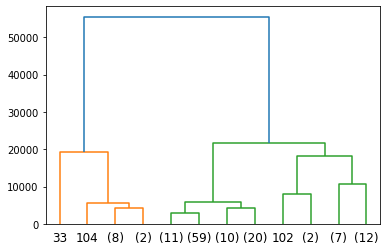

In [35]:
# Calculate linkage matrix
link = linkage(X, method='average')

# Matrix should be n x 4
#display(link)

# Build dendrogram from linkage
# Show p = 3 levels of the dendrogram
dend = dendrogram(link, p=3, truncate_mode = 'level')

####  Part 4 : Answers here:

Dendrograms can be used to find the best method of assigning elements to clusters.
The height of each branch tells us about the similarity of the elemnts, e.g. in this dendrogram, the elements in the orange cluster are slightly more similar to each other than the elements in the green cluster.

### Part 5 (optional bonus task): Implement K-Means clustering

 - For an extra point (pass with honors i.e. 100 in the 0/50/100 grading scheme), write your <b>own implementation</b> of the K-means clustering algorithm. The bonus point will be granted for a working implementation of the algorithm. It will not be granted for e.g. merely performing clustering using the scikit-learn implementation of K-Means or an unfinished implementation.
 - Visualize the labels predicted by your K-Means implementation against the real labels and compute the adjusted rand index.
 - Compare your K-Means implementation to the scikit-learn implementation. Do you get the same results? If not, why?
 - Remember to comment your code for readability.

In [ ]:
# code here...

####  Part 5 : Answers here: